In [8]:
from docx import Document
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import spacy
from spacy.matcher import PhraseMatcher
import matplotlib.pyplot as plt

In [9]:
%run -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [10]:
mypath='./CVs/fimatix/text' #enter your path here where you saved the resumes

onlytextfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
print(onlytextfiles)

['./CVs/fimatix/text/JS2.txt', './CVs/fimatix/text/HI.txt', './CVs/fimatix/text/JR.txt', './CVs/fimatix/text/JS.txt', './CVs/fimatix/text/HN.txt', './CVs/fimatix/text/AH.txt']


# Make the matcher

In [11]:
def make_matcher():
    keyword_dict = pd.read_csv('./data/Skills-by-DOS-discipline.csv')
    ac_words = [nlp(text) for text in keyword_dict['Agile Coach'].dropna(axis = 0)]
    dev_words = [nlp(text) for text in keyword_dict['Developer'].dropna(axis = 0)]
    ba_words = [nlp(text) for text in keyword_dict['Business Analyst'].dropna(axis = 0)]
    comms_mgr_words = [nlp(text) for text in keyword_dict['Communications Manager'].dropna(axis = 0)]
    cont_des_words = [nlp(text) for text in keyword_dict['Content Designer'].dropna(axis = 0)]
    sec_con_words = [nlp(text) for text in keyword_dict['Security Consultant'].dropna(axis = 0)]
    data_arch_words = [nlp(text) for text in keyword_dict['Data Architect'].dropna(axis = 0)]
    data_eng_words = [nlp(text) for text in keyword_dict['Data Engineer'].dropna(axis = 0)]
    data_science_words = [nlp(text) for text in keyword_dict['Data Scientist'].dropna(axis = 0)]
    del_man_words =  [nlp(text) for text in keyword_dict['Delivery Manager'].dropna(axis = 0)]
    designer_words = [nlp(text) for text in keyword_dict['Designer'].dropna(axis = 0)]
    perf_ana_words = [nlp(text) for text in keyword_dict['Performance Analyst'].dropna(axis = 0)]
    folio_words = [nlp(text) for text in keyword_dict['Portfolio Manager'].dropna(axis = 0)]
    prod_man_words = [nlp(text) for text in keyword_dict['Product Manager'].dropna(axis = 0)]
    prog_man_words = [nlp(text) for text in keyword_dict['Programme Manager'].dropna(axis = 0)]
    qa_words = [nlp(text) for text in keyword_dict['Quality Assurance Analyst'].dropna(axis = 0)]
    serv_man_words = [nlp(text) for text in keyword_dict['Service Manager'].dropna(axis = 0)]
    ta_words = [nlp(text) for text in keyword_dict['Technical Architect'].dropna(axis = 0)]
    ux_words = [nlp(text) for text in keyword_dict['User Researcher'].dropna(axis = 0)]
    web_ops_words = [nlp(text) for text in keyword_dict['Web Operations'].dropna(axis = 0)]
	

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Agile Coach', None, *ac_words)
    matcher.add('Developer', None, *dev_words)
    matcher.add('Delivery', None, *del_man_words)
    matcher.add('BA', None, *ba_words)
    matcher.add('Comns', None, *comms_mgr_words)
    matcher.add('Content', None, *cont_des_words)
    matcher.add('Security', None, *sec_con_words)
    matcher.add('Data Arch', None, *data_arch_words)
    matcher.add('Data Eng', None, *data_eng_words)
    matcher.add('Data Science', None, *data_science_words)
    matcher.add('Desgner', None, *designer_words)
    matcher.add('Performance', None, *perf_ana_words)
    matcher.add('Portfolio', None, *folio_words)
    matcher.add('Product', None, *prod_man_words)
    matcher.add('Programme', None, *prog_man_words)
    matcher.add('QA', None, *qa_words)
    matcher.add('Service', None, *serv_man_words)
    matcher.add('Tech Arch', None, *ta_words)
    matcher.add('UX Research', None, *ux_words)
    matcher.add('Web Ops', None, *web_ops_words)
    
    return matcher

# Function that does phrase matching and builds a candidate profile

In [12]:
def create_profile(file):
    text = ""
    with open(file, 'rb') as f:
        text = f.read()

    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()

    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('./data/Skills-by-DOS-discipline.csv')
    ac_words = [nlp(text) for text in keyword_dict['Agile Coach'].dropna(axis = 0)]
    dev_words = [nlp(text) for text in keyword_dict['Developer'].dropna(axis = 0)]
    ba_words = [nlp(text) for text in keyword_dict['Business Analyst'].dropna(axis = 0)]
    comms_mgr_words = [nlp(text) for text in keyword_dict['Communications Manager'].dropna(axis = 0)]
    cont_des_words = [nlp(text) for text in keyword_dict['Content Designer'].dropna(axis = 0)]
    sec_con_words = [nlp(text) for text in keyword_dict['Security Consultant'].dropna(axis = 0)]
    data_arch_words = [nlp(text) for text in keyword_dict['Data Architect'].dropna(axis = 0)]
    data_eng_words = [nlp(text) for text in keyword_dict['Data Engineer'].dropna(axis = 0)]
    data_science_words = [nlp(text) for text in keyword_dict['Data Scientist'].dropna(axis = 0)]
    del_man_words =  [nlp(text) for text in keyword_dict['Delivery Manager'].dropna(axis = 0)]
    designer_words = [nlp(text) for text in keyword_dict['Designer'].dropna(axis = 0)]
    perf_ana_words = [nlp(text) for text in keyword_dict['Performance Analyst'].dropna(axis = 0)]
    folio_words = [nlp(text) for text in keyword_dict['Portfolio Manager'].dropna(axis = 0)]
    prod_man_words = [nlp(text) for text in keyword_dict['Product Manager'].dropna(axis = 0)]
    prog_man_words = [nlp(text) for text in keyword_dict['Programme Manager'].dropna(axis = 0)]
    qa_words = [nlp(text) for text in keyword_dict['Quality Assurance Analyst'].dropna(axis = 0)]
    serv_man_words = [nlp(text) for text in keyword_dict['Service Manager'].dropna(axis = 0)]
    ta_words = [nlp(text) for text in keyword_dict['Technical Architect'].dropna(axis = 0)]
    ux_words = [nlp(text) for text in keyword_dict['User Researcher'].dropna(axis = 0)]
    web_ops_words = [nlp(text) for text in keyword_dict['Web Operations'].dropna(axis = 0)]
	
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Agile Coach', None, *ac_words)
    matcher.add('Developer', None, *dev_words)
    matcher.add('Delivery', None, *del_man_words)
    matcher.add('BA', None, *ba_words)
    matcher.add('Comns', None, *comms_mgr_words)
    matcher.add('Content', None, *cont_des_words)
    matcher.add('Security', None, *sec_con_words)
    matcher.add('Data Arch', None, *data_arch_words)
    matcher.add('Data Eng', None, *data_eng_words)
    matcher.add('Data Science', None, *data_science_words)
    matcher.add('Desgner', None, *designer_words)
    matcher.add('Performance', None, *perf_ana_words)
    matcher.add('Portfolio', None, *folio_words)
    matcher.add('Product', None, *prod_man_words)
    matcher.add('Prog', None, *prog_man_words)
    matcher.add('QA', None, *qa_words)
    matcher.add('Service', None, *serv_man_words)
    matcher.add('TechArch', None, *ta_words)
    matcher.add('UX Research', None, *ux_words)
    matcher.add('Web Ops', None, *web_ops_words)

#     print(matcher)
    
    doc = nlp(text)
#     for ent in doc.ents:
#         if ent.label_ == "DATE":
#             pass
# #             print(ent.label_, ent.text)
        
    d = []  
    matches = matcher(doc)
#     print("MATCHES " + str(matches))
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
#         print(rule_id + span.text)
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
#     print("KEY WORDS: " + str(keywords))
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends

# Code to execute/call the above functions and make plots

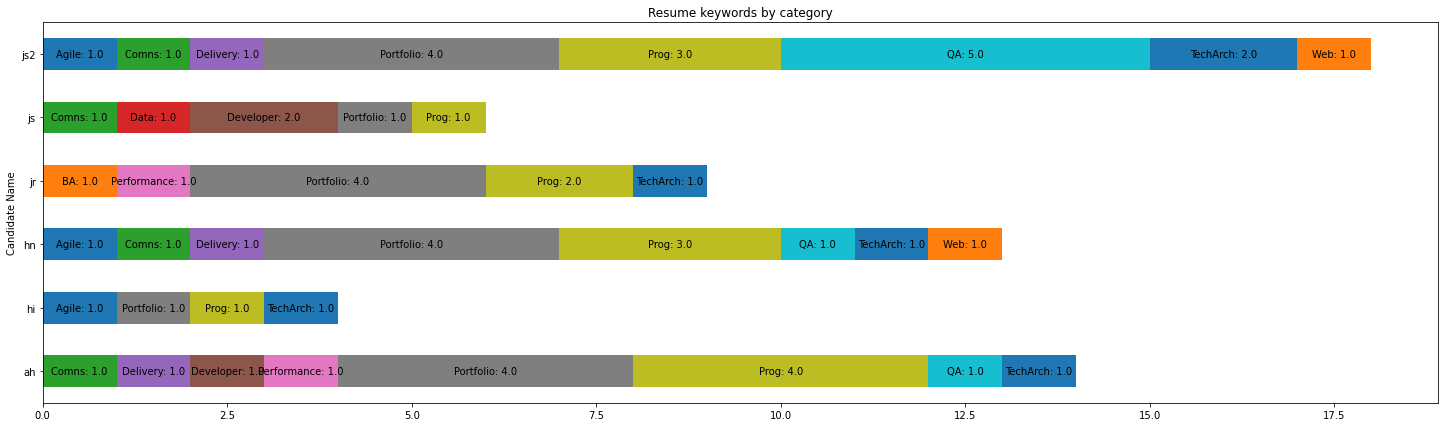

In [13]:
# matcher = make_matcher()

final_database=pd.DataFrame()
i = 0 
while i < len(onlytextfiles):
    file = onlytextfiles[i]
    dat = create_profile(file)

    final_database = final_database.append(dat)
    i +=1
#     print(final_database)

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']

plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()

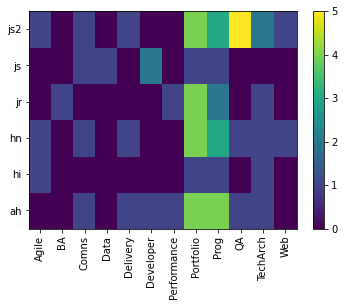

In [14]:
import numpy as np
df = new_data

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.tick_params(axis='x', rotation=90)
plt.colorbar()
plt.show()